### Modélisation : 

In [1]:
# Pour le formatage du code pour respecter la convention PEP8
%load_ext nb_black

<IPython.core.display.Javascript object>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys, time
import fnmatch

# Pour les warnings
import warnings

warnings.filterwarnings("ignore")

import logging

logging.disable(logging.WARNING)  # disable WARNING, INFO and DEBUG logging everywhere
# Pour le ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler

<IPython.core.display.Javascript object>

In [4]:
# Modification des paramètres d'affichages des colonnes, lignes et largeurs des colonnes pour obtenir le plus d'information
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", None)
pd.set_option("float_format", lambda x: "%.4f" % x)

<IPython.core.display.Javascript object>

#### Import du fichier : 

In [95]:
data = pd.read_csv(
    "/Users/hananemaghlazi/Desktop/Datascientist/Projets_Formation/P7_MAGHLAZI_Hanane/data.csv"
)
data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_

<IPython.core.display.Javascript object>

- Tester la modélisation sur un échantillon : 

In [96]:
# J'extrais un échantillon 1 % :
data_sample = data.sample(frac=0.01).round(3)
data_sample.shape

(3075, 760)

<IPython.core.display.Javascript object>

In [97]:
data_sample.TARGET.value_counts(normalize="True")

0.0000   0.9093
1.0000   0.0907
Name: TARGET, dtype: float64

<IPython.core.display.Javascript object>

#### Régression logistique en tant que baseline : 

- Preprocessing

In [100]:
model = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=42))
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

<IPython.core.display.Javascript object>

- Séparation du jeu de données en jeu d'entrainement et de test : 
- Séparation : 80% entrainement, 20% test

In [101]:
# Les features
X = data_sample.drop(["TARGET"], axis=1)
# Les targets
Y = data_sample[["TARGET"]]
# Division du dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8, stratify=Y, random_state=42
)
print("shape of original dataset :", data_sample.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (3075, 760)
shape of input - training set (2460, 759)
shape of output - training set (2460, 1)
shape of input - testing set (615, 759)
shape of output - testing set (615, 1)


<IPython.core.display.Javascript object>

In [102]:
Y

,TARGET
39515,0.0000
109176,1.0000
18097,0.0000
150636,1.0000
150025,0.0000
...,...
167134,0.0000
279844,1.0000
83457,0.0000
249122,0.0000


<IPython.core.display.Javascript object>

In [103]:
X

SK_ID_CURR  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
39515  145755.0000       0.0000        0.0000           1.0000        0.0000   
109176 226625.0000       0.0000        1.0000           1.0000        0.0000   
18097  121109.0000       1.0000        0.0000           0.0000        0.0000   
150636 274628.0000       0.0000        0.0000           1.0000        2.0000   
150025 273923.0000       1.0000        0.0000           1.0000        1.0000   
...            ...          ...           ...              ...           ...   
167134 293755.0000       1.0000        1.0000           1.0000        0.0000   
279844 424213.0000       0.0000        0.0000           0.0000        2.0000   
83457  196802.0000       1.0000        0.0000           0.0000        1.0000   
249122 388246.0000       1.0000        0.0000           0.0000        0.0000   
188556 318611.0000       1.0000        0.0000           1.0000        0.0000   

        AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
39515        135000.0000  180000.0000    9000.0000      180000.0000   
109176       112500.0000  178290.0000   14215.5000      157500.0000   
18097         67500.0000  254700.0000   14751.0000      225000.0000   
150636       405000.0000 1024740.0000   49428.0000      900000.0000   
150025       112500.0000  646920.0000   20997.0000      540000.0000   
...                  ...          ...          ...              ...   
167134       157500.0000  598500.0000   28921.5000      598500.0000   
279844       180000.0000  450000.0000   27324.0000      450000.0000   
83457         99000.0000  576072.0000   26986.5000      405000.0000   
249122        76500.0000  344803.5000   24651.0000      319500.0000   
188556        67500.0000  270000.0000    9697.5000      270000.0000   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
39515                       0.0150 -16745.0000     -3078.0000   
109176                      0.0190  -9193.0000     -1484.0000   
18097                       0.0360 -23937.0000     -1648.0000   
150636                      0.0730 -15642.0000     -1648.0000   
150025                      0.0310 -15725.0000     -4881.0000   
...                            ...         ...            ...   
167134                      0.0290 -16566.0000     -2183.0000   
279844                      0.0150 -17237.0000     -3087.0000   
83457                       0.0100 -16626.0000      -564.0000   
249122                      0.0310 -24851.0000     -1648.0000   
188556                      0.0070 -20561.0000     -2083.0000   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
39515          -5822.0000        -291.0000       9.0000      1.0000   
109176         -3427.0000       -1565.0000      22.0000      1.0000   
18097          -4431.0000       -4436.0000       9.0000      1.0000   
150636          -144.0000       -1230.0000       9.0000      1.0000   
150025         -5009.0000       -5017.0000       9.0000      1.0000   
...                   ...              ...          ...         ...   
167134          -230.0000        -121.0000       5.0000      1.0000   
279844         -4017.0000        -778.0000       9.0000      1.0000   
83457          -3499.0000         -22.0000       9.0000      1.0000   
249122         -7948.0000       -4707.0000       9.0000      1.0000   
188556         -8802.0000       -4048.0000       9.0000      1.0000   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
39515           1.0000           1.0000            1.0000      0.0000   
109176          1.0000           0.0000            1.0000      0.0000   
18097           0.0000           0.0000            1.0000      1.0000   
150636          0.0000           0.0000            1.0000      0.0000   
150025          1.0000           1.0000            1.0000      1.0000   
...                ...              ...               ...         ...   
167134          1.0000           0.0000          

<IPython.core.display.Javascript object>

In [63]:
# Fonction qui va entrainer le modèle,prédire et évaluer l'ensemble des modèles
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_true = y_test
    print(classification_report(y_true, y_pred))
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC : %0.4f" % roc_auc)

    fig = plt.figure(figsize=(20, 15))

    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = [
        "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")

    plt.subplot(222)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fper, tper, thresholds = roc_curve(y_true, y_pred_proba)
    plt.plot(fper, tper, color="red", label="AUC = %0.4f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       559
         1.0       0.32      0.11      0.16        56

    accuracy                           0.90       615
   macro avg       0.62      0.54      0.55       615
weighted avg       0.86      0.90      0.87       615

AUC : 0.7389


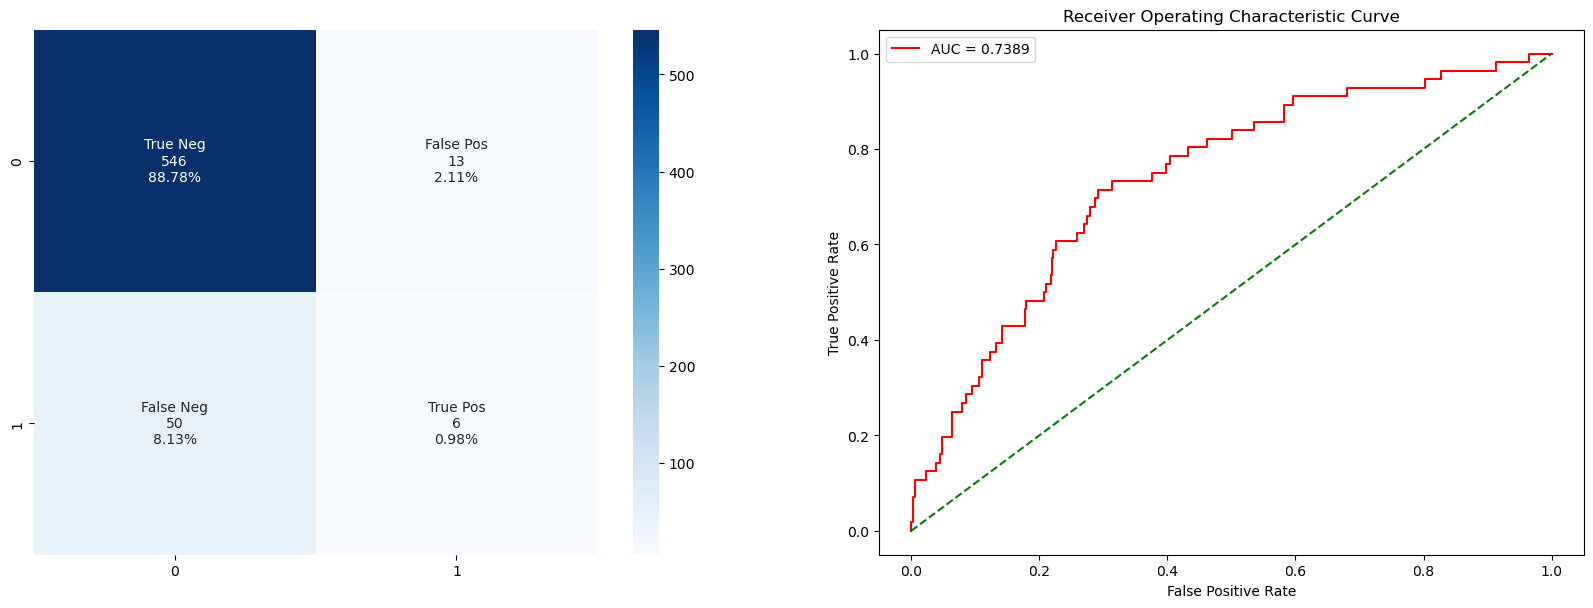

<IPython.core.display.Javascript object>

In [104]:
evaluation(model)

De bons résultats pour la target 0 mais pas pour la target 1

classes non équilibrées ? voir ressources
différents algos:  Random Forest, LightGBM , XGBOOST

In [105]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.72900685, 0.27099315],
       [0.93702186, 0.06297814],
       [0.94364458, 0.05635542],
       ...,
       [0.9857877 , 0.0142123 ],
       [0.98761732, 0.01238268],
       [0.98907521, 0.01092479]])

<IPython.core.display.Javascript object>